In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks
import seaborn as sns
import os,glob
import statsmodels.tsa.api as tsa


import missingno as miss
import datetime as dt
import statsmodels.tsa.api as tsa

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format',lambda x: f"{x:,.2f}")

In [3]:
# get list of files from folder
crime_files = sorted(glob.glob("Data/Chicago/"+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1312557,01/01/2001 01:00:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,513,5.00,NaN,41.70,-87.62
1,1310393,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1614,16.00,NaN,41.97,-87.85
2,1311226,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.00,NaN,41.95,-87.68
3,1310858,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.00,NaN,41.96,-87.71
4,1311503,01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER DANG WEAPON,BAR OR TAVERN,False,False,1933,19.00,NaN,41.93,-87.65
...,...,...,...,...,...,...,...,...,...,...,...,...
101087,13091442,05/31/2023 12:50:00 PM,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,STREET,False,False,725,7.00,15.00,41.78,-87.67
101088,13092455,05/31/2023 12:50:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,1632,16.00,38.00,41.95,-87.79
101089,13093687,05/31/2023 12:52:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,CURRENCY EXCHANGE,False,False,124,1.00,28.00,41.87,-87.64
101090,13094726,05/31/2023 12:55:00 PM,CRIMINAL TRESPASS,TO LAND,RESTAURANT,False,False,112,1.00,34.00,41.88,-87.62


In [4]:
# explicitly setting the format to speed up pd.to_datetime
date_format = "%m/%d/%Y %H:%M:%S %p"


### Demonstrating/testing date_format
example = df.loc[0,'Date']
display(example)
pd.to_datetime(example,format=date_format)

0    01/01/2001 01:00:00 PM
0    01/01/2002 01:00:00 AM
0    01/01/2003 01:00:00 PM
0    01/01/2004 01:00:00 AM
0    01/01/2005 01:00:00 PM
0    01/01/2006 01:00:00 AM
0    01/01/2007 01:00:00 AM
0    01/01/2008 01:00:00 PM
0    01/01/2009 01:00:00 AM
0    01/01/2010 01:00:00 PM
0    01/01/2011 01:00:00 AM
0    01/01/2012 01:00:00 AM
0    01/01/2013 01:00:00 AM
0    01/01/2014 01:00:00 AM
0    01/01/2015 01:00:00 AM
0    01/01/2016 01:00:00 AM
0    01/01/2017 01:00:00 PM
0    01/01/2018 01:00:00 AM
0    01/01/2019 01:00:00 PM
0    01/01/2020 01:00:00 PM
0    01/01/2021 01:00:00 PM
0    01/01/2022 01:00:00 PM
0    01/01/2023 01:00:00 AM
Name: Date, dtype: object

0   2001-01-01 01:00:00
0   2002-01-01 01:00:00
0   2003-01-01 01:00:00
0   2004-01-01 01:00:00
0   2005-01-01 01:00:00
0   2006-01-01 01:00:00
0   2007-01-01 01:00:00
0   2008-01-01 01:00:00
0   2009-01-01 01:00:00
0   2010-01-01 01:00:00
0   2011-01-01 01:00:00
0   2012-01-01 01:00:00
0   2013-01-01 01:00:00
0   2014-01-01 01:00:00
0   2015-01-01 01:00:00
0   2016-01-01 01:00:00
0   2017-01-01 01:00:00
0   2018-01-01 01:00:00
0   2019-01-01 01:00:00
0   2020-01-01 01:00:00
0   2021-01-01 01:00:00
0   2022-01-01 01:00:00
0   2023-01-01 01:00:00
Name: Date, dtype: datetime64[ns]

In [5]:
# this cell can take up to 1 min to run
df['Datetime'] = pd.to_datetime(df['Date'], format=date_format)
df = df.sort_values('Datetime')
df = df.set_index('Datetime')
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Datetime,,,,,,,,,,,,
2001-01-01 01:00:00,1312557,01/01/2001 01:00:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,513,5.00,NaN,41.70,-87.62
2001-01-01 01:00:00,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.00,NaN,42.01,-87.68
2001-01-01 01:00:00,1311269,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.00,NaN,41.76,-87.56
2001-01-01 01:00:00,1310741,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,1722,17.00,NaN,41.97,-87.74
2001-01-01 01:00:00,1330412,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1813,18.00,NaN,41.92,-87.65
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31 12:50:00,13092455,05/31/2023 12:50:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,1632,16.00,38.00,41.95,-87.79
2023-05-31 12:50:00,13091442,05/31/2023 12:50:00 PM,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,STREET,False,False,725,7.00,15.00,41.78,-87.67
2023-05-31 12:52:00,13093687,05/31/2023 12:52:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,CURRENCY EXCHANGE,False,False,124,1.00,28.00,41.87,-87.64


In [6]:
(df.isna().sum()/len(df)).round(2)


ID                     0.00
Date                   0.00
Primary Type           0.00
Description            0.00
Location Description   0.00
Arrest                 0.00
Domestic               0.00
Beat                   0.00
District               0.00
Ward                   0.08
Latitude               0.01
Longitude              0.01
dtype: float64

In [7]:
# save the years for every crime
df["Year"] = df.index.year
df["Year"] = df["Year"].astype(str)
df["Year"].value_counts()

Year
2002    486804
2001    485882
2003    475981
2004    469421
2005    453771
2006    448175
2007    437084
2008    427167
2009    392823
2010    370499
2011    351968
2012    336267
2013    307471
2014    275737
2016    269800
2017    269081
2018    268792
2015    264765
2019    261270
2022    238531
2020    212133
2021    208640
2023    101092
Name: count, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7813154 entries, 2001-01-01 01:00:00 to 2023-05-31 12:57:00
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
 12  Year                  object 
dtypes: bool(2), float64(4), int64(2), object(5)
memory usage: 730.2+ MB


In [9]:
df.isna().sum()

ID                           0
Date                         0
Primary Type                 0
Description                  0
Location Description     10563
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614848
Latitude                 87496
Longitude                87496
Year                         0
dtype: int64

In [10]:
df.index

DatetimeIndex(['2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               ...
               '2023-05-31 12:38:00', '2023-05-31 12:38:00',
               '2023-05-31 12:45:00', '2023-05-31 12:45:00',
               '2023-05-31 12:47:00', '2023-05-31 12:50:00',
               '2023-05-31 12:50:00', '2023-05-31 12:52:00',
               '2023-05-31 12:55:00', '2023-05-31 12:57:00'],
              dtype='datetime64[ns]', name='Datetime', length=7813154, freq=None)

In [11]:
## making eda_df with date as a column instead of index
eda_df = df.reset_index()
eda_df

,Datetime,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Year
0,2001-01-01 01:00:00,1312557,01/01/2001 01:00:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,513,5.00,NaN,41.70,-87.62,2001
1,2001-01-01 01:00:00,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.00,NaN,42.01,-87.68,2001
2,2001-01-01 01:00:00,1311269,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.00,NaN,41.76,-87.56,2001
3,2001-01-01 01:00:00,1310741,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,1722,17.00,NaN,41.97,-87.74,2001
4,2001-01-01 01:00:00,1330412,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1813,18.00,NaN,41.92,-87.65,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813149,2023-05-31 12:50:00,13092455,05/31/2023 12:50:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,1632,16.00,38.00,41.95,-87.79,2023
7813150,2023-05-31 12:50:00,13091442,05/31/2023 12:50:00 PM,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,STREET,False,False,725,7.00,15.00,41.78,-87.67,2023
7813151,2023-05-31 12:52:00,13093687,05/31/2023 12:52:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,CURRENCY EXCHANGE,False,False,124,1.00,28.00,41.87,-87.64,2023
7813152,2023-05-31 12:55:00,13094726,05/31/2023 12:55:00 PM,CRIMINAL TRESPASS,TO LAND,RESTAURANT,False,False,112,1.00,34.00,41.88,-87.62,2023


In [12]:
## feature engineering for dates
eda_df['year'] = eda_df['Datetime'].dt.year
eda_df['month'] = eda_df['Datetime'].dt.month_name()
eda_df['day of month'] = eda_df['Datetime'].dt.day
eda_df['day of week'] = eda_df['Datetime'].dt.day_name()
eda_df['hour'] = eda_df['Datetime'].dt.hour
eda_df

,Datetime,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Year,year,month,day of month,day of week,hour
0,2001-01-01 01:00:00,1312557,01/01/2001 01:00:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,513,5.00,NaN,41.70,-87.62,2001,2001,January,1,Monday,1
1,2001-01-01 01:00:00,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.00,NaN,42.01,-87.68,2001,2001,January,1,Monday,1
2,2001-01-01 01:00:00,1311269,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.00,NaN,41.76,-87.56,2001,2001,January,1,Monday,1
3,2001-01-01 01:00:00,1310741,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,1722,17.00,NaN,41.97,-87.74,2001,2001,January,1,Monday,1
4,2001-01-01 01:00:00,1330412,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1813,18.00,NaN,41.92,-87.65,2001,2001,January,1,Monday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813149,2023-05-31 12:50:00,13092455,05/31/2023 12:50:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,1632,16.00,38.00,41.95,-87.79,2023,2023,May,31,Wednesday,12
7813150,2023-05-31 12:50:00,13091442,05/31/2023 12:50:00 PM,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,STREET,False,False,725,7.00,15.00,41.78,-87.67,2023,2023,May,31,Wednesday,12
7813151,2023-05-31 12:52:00,13093687,05/31/2023 12:52:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,CURRENCY EXCHANGE,False,False,124,1.00,28.00,41.87,-87.64,2023,2023,May,31,Wednesday,12
7813152,2023-05-31 12:55:00,13094726,05/31/2023 12:55:00 PM,CRIMINAL TRESPASS,TO LAND,RESTAURANT,False,False,112,1.00,34.00,41.88,-87.62,2023,2023,May,31,Wednesday,12


In [13]:
## let's add a weekend feature
eda_df['weekend'] = eda_df['day of week'].isin(['Saturday','Sunday'])
eda_df

,Datetime,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Year,year,month,day of month,day of week,hour,weekend
0,2001-01-01 01:00:00,1312557,01/01/2001 01:00:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,513,5.00,NaN,41.70,-87.62,2001,2001,January,1,Monday,1,False
1,2001-01-01 01:00:00,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.00,NaN,42.01,-87.68,2001,2001,January,1,Monday,1,False
2,2001-01-01 01:00:00,1311269,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.00,NaN,41.76,-87.56,2001,2001,January,1,Monday,1,False
3,2001-01-01 01:00:00,1310741,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,1722,17.00,NaN,41.97,-87.74,2001,2001,January,1,Monday,1,False
4,2001-01-01 01:00:00,1330412,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1813,18.00,NaN,41.92,-87.65,2001,2001,January,1,Monday,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813149,2023-05-31 12:50:00,13092455,05/31/2023 12:50:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,1632,16.00,38.00,41.95,-87.79,2023,2023,May,31,Wednesday,12,False
7813150,2023-05-31 12:50:00,13091442,05/31/2023 12:50:00 PM,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,STREET,False,False,725,7.00,15.00,41.78,-87.67,2023,2023,May,31,Wednesday,12,False
7813151,2023-05-31 12:52:00,13093687,05/31/2023 12:52:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,CURRENCY EXCHANGE,False,False,124,1.00,28.00,41.87,-87.64,2023,2023,May,31,Wednesday,12,False
7813152,2023-05-31 12:55:00,13094726,05/31/2023 12:55:00 PM,CRIMINAL TRESPASS,TO LAND,RESTAURANT,False,False,112,1.00,34.00,41.88,-87.62,2023,2023,May,31,Wednesday,12,False


In [14]:
## Calculate decade by subtracting the remainder and div by 10
eda_df['decade'] = eda_df['year'] - eda_df['year']%10
eda_df

,Datetime,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Year,year,month,day of month,day of week,hour,weekend,decade
0,2001-01-01 01:00:00,1312557,01/01/2001 01:00:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,513,5.00,NaN,41.70,-87.62,2001,2001,January,1,Monday,1,False,2000
1,2001-01-01 01:00:00,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.00,NaN,42.01,-87.68,2001,2001,January,1,Monday,1,False,2000
2,2001-01-01 01:00:00,1311269,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.00,NaN,41.76,-87.56,2001,2001,January,1,Monday,1,False,2000
3,2001-01-01 01:00:00,1310741,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,1722,17.00,NaN,41.97,-87.74,2001,2001,January,1,Monday,1,False,2000
4,2001-01-01 01:00:00,1330412,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1813,18.00,NaN,41.92,-87.65,2001,2001,January,1,Monday,1,False,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813149,2023-05-31 12:50:00,13092455,05/31/2023 12:50:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,1632,16.00,38.00,41.95,-87.79,2023,2023,May,31,Wednesday,12,False,2020
7813150,2023-05-31 12:50:00,13091442,05/31/2023 12:50:00 PM,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,STREET,False,False,725,7.00,15.00,41.78,-87.67,2023,2023,May,31,Wednesday,12,False,2020
7813151,2023-05-31 12:52:00,13093687,05/31/2023 12:52:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,CURRENCY EXCHANGE,False,False,124,1.00,28.00,41.87,-87.64,2023,2023,May,31,Wednesday,12,False,2020
7813152,2023-05-31 12:55:00,13094726,05/31/2023 12:55:00 PM,CRIMINAL TRESPASS,TO LAND,RESTAURANT,False,False,112,1.00,34.00,41.88,-87.62,2023,2023,May,31,Wednesday,12,False,2020


In [15]:
## Making eda_ts with dt index
eda_ts = eda_df.set_index('Datetime')

# 1) Comparing Police Districts:
* Which district has the most crimes? Which has the least?

In [16]:
eda_ts['District'].value_counts().sort_values(ascending=False)


District
8.00     524976
11.00    501293
6.00     456923
7.00     451626
25.00    444506
4.00     443561
3.00     396237
12.00    387322
9.00     381670
2.00     369931
19.00    350788
18.00    350673
5.00     346207
10.00    336605
15.00    334732
1.00     316093
14.00    302261
16.00    261586
22.00    256086
24.00    236058
17.00    225526
20.00    138201
31.00       242
21.00         4
Name: count, dtype: int64

In [17]:
eda_ts['District'].value_counts().sort_values(ascending=True)


District
21.00         4
31.00       242
20.00    138201
17.00    225526
24.00    236058
22.00    256086
16.00    261586
14.00    302261
1.00     316093
15.00    334732
10.00    336605
5.00     346207
18.00    350673
19.00    350788
2.00     369931
9.00     381670
12.00    387322
3.00     396237
4.00     443561
25.00    444506
7.00     451626
6.00     456923
11.00    501293
8.00     524976
Name: count, dtype: int64

* The district with the most crimes is 8.
* The district with the least crimes is 21.

# 2) Crimes Across the Years:
* Is the total number of crimes increasing or decreasing across the years?
* Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [18]:
eda_ts["Year"].value_counts()

Year
2002    486804
2001    485882
2003    475981
2004    469421
2005    453771
2006    448175
2007    437084
2008    427167
2009    392823
2010    370499
2011    351968
2012    336267
2013    307471
2014    275737
2016    269800
2017    269081
2018    268792
2015    264765
2019    261270
2022    238531
2020    212133
2021    208640
2023    101092
Name: count, dtype: int64

In [19]:
ts_a = eda_ts.resample("A").size().loc['2002':]
ts_a_pct_change = ts_a.pct_change()

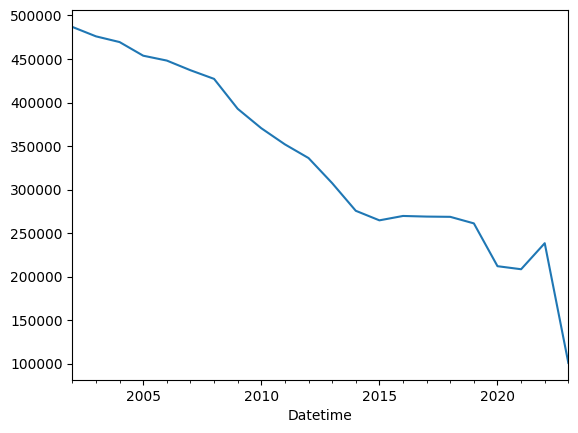

In [20]:
ax = ts_a.plot();

* The total number of crimes is decreasing across the years, as seen from the figure above, the trend is point down. 

# Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [21]:
eda_ts['Primary Type'].value_counts(1)

Primary Type
THEFT                               0.21
BATTERY                             0.18
CRIMINAL DAMAGE                     0.11
NARCOTICS                           0.10
ASSAULT                             0.07
OTHER OFFENSE                       0.06
BURGLARY                            0.05
MOTOR VEHICLE THEFT                 0.05
DECEPTIVE PRACTICE                  0.04
ROBBERY                             0.04
CRIMINAL TRESPASS                   0.03
WEAPONS VIOLATION                   0.01
PROSTITUTION                        0.01
OFFENSE INVOLVING CHILDREN          0.01
PUBLIC PEACE VIOLATION              0.01
SEX OFFENSE                         0.00
CRIM SEXUAL ASSAULT                 0.00
INTERFERENCE WITH PUBLIC OFFICER    0.00
LIQUOR LAW VIOLATION                0.00
GAMBLING                            0.00
ARSON                               0.00
HOMICIDE                            0.00
KIDNAPPING                          0.00
CRIMINAL SEXUAL ASSAULT             0.00
STA

In [22]:
top_crimes = eda_ts['Primary Type'].value_counts(1).head(10).index
top_crimes 

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT',
       'OTHER OFFENSE', 'BURGLARY', 'MOTOR VEHICLE THEFT',
       'DECEPTIVE PRACTICE', 'ROBBERY'],
      dtype='object', name='Primary Type')

In [23]:
ts_top_crimes = eda_ts.groupby('Primary Type').resample("A").size()
ts_top_crimes

Primary Type       Datetime  
ARSON              2001-12-31    1011
                   2002-12-31    1032
                   2003-12-31     955
                   2004-12-31     778
                   2005-12-31     691
                                 ... 
WEAPONS VIOLATION  2019-12-31    6339
                   2020-12-31    8432
                   2021-12-31    8980
                   2022-12-31    8766
                   2023-12-31    3521
Length: 754, dtype: int64

In [24]:
## keeping only most common
ts_top_crimes = ts_top_crimes.unstack(0).fillna(0)[top_crimes]
ts_top_crimes

Primary Type,THEFT,BATTERY,CRIMINAL DAMAGE,NARCOTICS,ASSAULT,OTHER OFFENSE,BURGLARY,MOTOR VEHICLE THEFT,DECEPTIVE PRACTICE,ROBBERY
Datetime,,,,,,,,,,
2001-12-31,"99,277.00","93,460.00","55,858.00","50,567.00","31,384.00","29,663.00","26,014.00","27,552.00","14,946.00","18,441.00"
2002-12-31,"98,332.00","94,153.00","55,941.00","51,789.00","31,523.00","32,600.00","25,623.00","25,121.00","13,731.00","18,523.00"
2003-12-31,"98,876.00","88,379.00","55,011.00","54,288.00","29,477.00","31,147.00","25,157.00","22,748.00","13,459.00","17,332.00"
2004-12-31,"95,463.00","87,136.00","53,164.00","57,060.00","28,850.00","29,532.00","24,564.00","22,805.00","13,255.00","15,978.00"
2005-12-31,"85,684.00","83,964.00","54,548.00","56,234.00","27,067.00","28,028.00","25,503.00","22,497.00","13,590.00","16,047.00"
2006-12-31,"86,240.00","80,666.00","57,124.00","55,813.00","25,945.00","27,101.00","24,324.00","21,818.00","13,606.00","15,968.00"
2007-12-31,"85,156.00","79,593.00","53,749.00","54,454.00","26,313.00","26,863.00","24,858.00","18,573.00","14,170.00","15,450.00"
2008-12-31,"88,435.00","75,926.00","52,842.00","46,507.00","25,449.00","26,533.00","26,218.00","18,881.00","14,931.00","16,703.00"
2009-12-31,"80,975.00","68,460.00","47,725.00","43,542.00","22,861.00","25,601.00","26,767.00","15,482.00","13,876.00","15,981.00"


In [25]:
ts_top_crimes = ts_top_crimes.loc['2002':]

<Axes: xlabel='Datetime'>

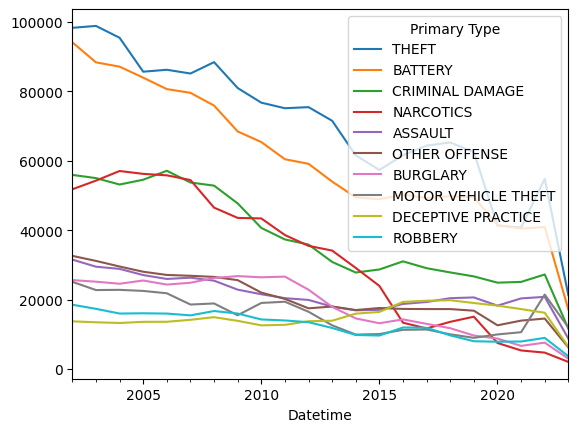

In [26]:
ts_top_crimes.plot()

* From the top ten most crimes committed in the above figure, it looks like these crimes are in line with the overall crime rate, it is also decrease. None of the top 10 crimes have a inverse outcome as compared with the total amount of crimes. 

# 4) Comparing Months:
* What months have the most crime? What months have the least?
* Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [27]:
eda_ts.head()


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Year,year,month,day of month,day of week,hour,weekend,decade
Datetime,,,,,,,,,,,,,,,,,,,,
2001-01-01 01:00:00,1312557,01/01/2001 01:00:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,513,5.00,NaN,41.70,-87.62,2001,2001,January,1,Monday,1,False,2000
2001-01-01 01:00:00,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.00,NaN,42.01,-87.68,2001,2001,January,1,Monday,1,False,2000
2001-01-01 01:00:00,1311269,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.00,NaN,41.76,-87.56,2001,2001,January,1,Monday,1,False,2000
2001-01-01 01:00:00,1310741,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,1722,17.00,NaN,41.97,-87.74,2001,2001,January,1,Monday,1,False,2000
2001-01-01 01:00:00,1330412,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1813,18.00,NaN,41.92,-87.65,2001,2001,January,1,Monday,1,False,2000


In [28]:
eda_df['month_num'] = eda_df['Datetime'].dt.month

In [29]:
eda_df

,Datetime,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Year,year,month,day of month,day of week,hour,weekend,decade,month_num
0,2001-01-01 01:00:00,1312557,01/01/2001 01:00:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,513,5.00,NaN,41.70,-87.62,2001,2001,January,1,Monday,1,False,2000,1
1,2001-01-01 01:00:00,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.00,NaN,42.01,-87.68,2001,2001,January,1,Monday,1,False,2000,1
2,2001-01-01 01:00:00,1311269,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.00,NaN,41.76,-87.56,2001,2001,January,1,Monday,1,False,2000,1
3,2001-01-01 01:00:00,1310741,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,1722,17.00,NaN,41.97,-87.74,2001,2001,January,1,Monday,1,False,2000,1
4,2001-01-01 01:00:00,1330412,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1813,18.00,NaN,41.92,-87.65,2001,2001,January,1,Monday,1,False,2000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813149,2023-05-31 12:50:00,13092455,05/31/2023 12:50:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,1632,16.00,38.00,41.95,-87.79,2023,2023,May,31,Wednesday,12,False,2020,5
7813150,2023-05-31 12:50:00,13091442,05/31/2023 12:50:00 PM,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,STREET,False,False,725,7.00,15.00,41.78,-87.67,2023,2023,May,31,Wednesday,12,False,2020,5
7813151,2023-05-31 12:52:00,13093687,05/31/2023 12:52:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,CURRENCY EXCHANGE,False,False,124,1.00,28.00,41.87,-87.64,2023,2023,May,31,Wednesday,12,False,2020,5
7813152,2023-05-31 12:55:00,13094726,05/31/2023 12:55:00 PM,CRIMINAL TRESPASS,TO LAND,RESTAURANT,False,False,112,1.00,34.00,41.88,-87.62,2023,2023,May,31,Wednesday,12,False,2020,5


In [30]:
eda_df.loc['2002':, 'month_num'].value_counts().sort_values(ascending=False)

month_num
7     539784
5     537365
8     534777
6     515148
10    505141
9     501619
4     489210
3     474342
11    457218
1     439743
12    435520
2     381287
Name: count, dtype: int64

* The month with the most crimes are months 6-8 (Jun-Aug).

In [31]:
eda_df.loc['2002':, 'month_num'].value_counts().sort_values(ascending=True)

month_num
2     381287
12    435520
1     439743
11    457218
3     474342
4     489210
9     501619
10    505141
6     515148
8     534777
5     537365
7     539784
Name: count, dtype: int64

* The month with the least crimes are months 11-2 (Nov-Feb).

In [32]:
## Get # of crimes by Hour
crimes_by_month = eda_df.groupby('Primary Type')['month_num'].value_counts().sort_index()
crimes_by_month

Primary Type       month_num
ARSON              1             963
                   2             840
                   3            1140
                   4            1134
                   5            1278
                                ... 
WEAPONS VIOLATION  8            9887
                   9            9435
                   10           9190
                   11           7952
                   12           7401
Name: count, Length: 415, dtype: int64

In [33]:
## convert to dataframe and reset_index()
plot_df = crimes_by_month.to_frame('# of Crimes').reset_index()
plot_df

,Primary Type,month_num,# of Crimes
0,ARSON,1,963
1,ARSON,2,840
2,ARSON,3,1140
3,ARSON,4,1134
4,ARSON,5,1278
...,...,...,...
410,WEAPONS VIOLATION,8,9887
411,WEAPONS VIOLATION,9,9435
412,WEAPONS VIOLATION,10,9190
413,WEAPONS VIOLATION,11,7952


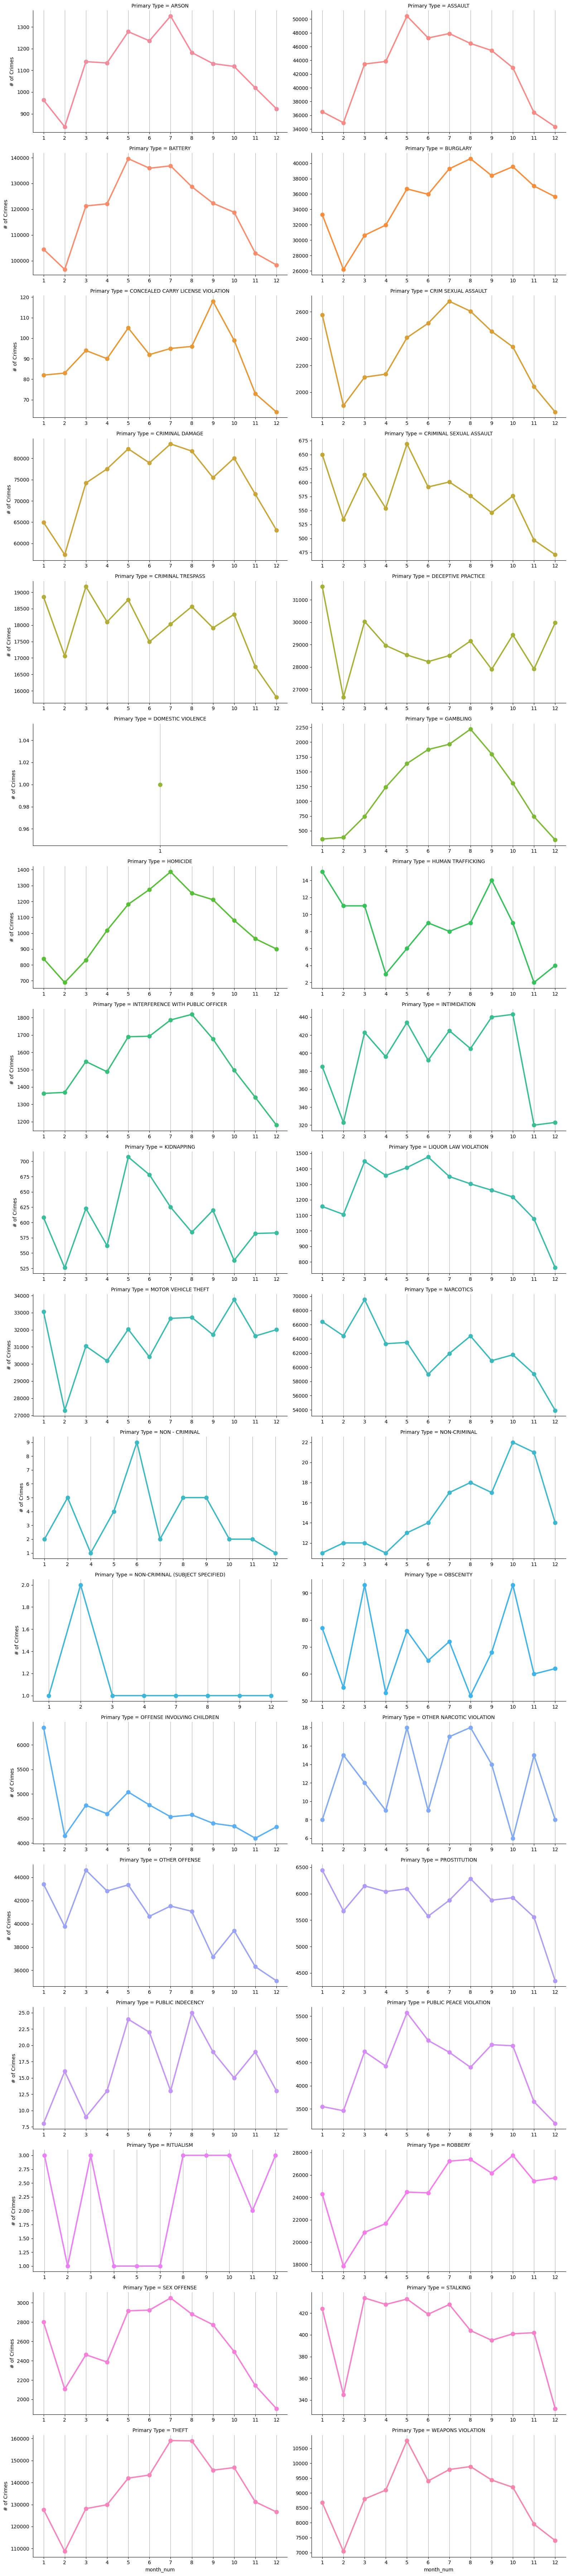

In [34]:
g = sns.catplot(data=plot_df, x='month_num', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

* From the figure above, of all of the crimes that decrease in crime rate when the total amount of crimes increase are concealed carry license violations, criminal tresspass, deceptive practice, and narcotics. These crimes do not follow the patterns seen earlier with months. 